In [33]:
import pandas as pd

In [34]:
df = pd.read_csv("DS/Sales_April_2019.csv")

In [35]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [36]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18383 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          18324 non-null  object
 1   Product           18324 non-null  object
 2   Quantity Ordered  18324 non-null  object
 3   Price Each        18324 non-null  object
 4   Order Date        18324 non-null  object
 5   Purchase Address  18324 non-null  object
dtypes: object(6)
memory usage: 861.8+ KB


In [38]:
df= df.fillna(method='bfill')

C:\Users\Pratham\AppData\Local\Temp\ipykernel_35288\950475378.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='bfill')


In [39]:
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [40]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [41]:
df = df[df['Product'] != 'Product']

In [42]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

C:\Users\Pratham\AppData\Local\Temp\ipykernel_35288\3072535395.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [43]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)


In [44]:
df['Order ID'] = df['Order ID'].astype(int)

In [45]:
df['Price Each'] = df['Price Each'].astype(float)

In [46]:
df["Total Cost"] = df["Price Each"] * df['Quantity Ordered']

In [47]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Cost
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99


In [48]:
df.drop_duplicates(inplace=True)

In [49]:
df.describe()

,Order ID,Quantity Ordered,Price Each,Order Date,Total Cost
count,18267.000000,18267.000000,18267.000000,18267,18267.000000
mean,185330.420595,1.124760,184.573645,2019-04-16 03:15:17.135818752,185.832750
min,176558.000000,1.000000,2.990000,2019-04-01 03:09:00,2.990000
25%,180953.500000,1.000000,11.950000,2019-04-08 17:03:00,11.950000
50%,185332.000000,1.000000,14.950000,2019-04-16 00:47:00,14.950000
75%,189707.500000,1.000000,150.000000,2019-04-23 15:19:30,150.000000
max,194094.000000,7.000000,1700.000000,2019-05-01 04:25:00,3400.000000
std,5061.670698,0.436651,331.069060,NaN,332.381465


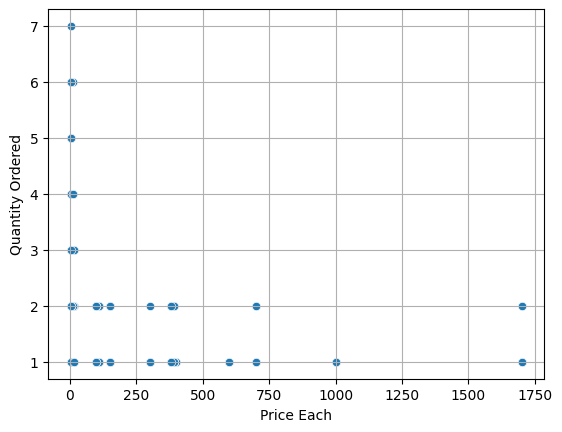

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df, x='Price Each', y='Quantity Ordered')

plt.ylabel('Quantity Ordered')
plt.xlabel('Price Each')
plt.grid(True)
plt.show()


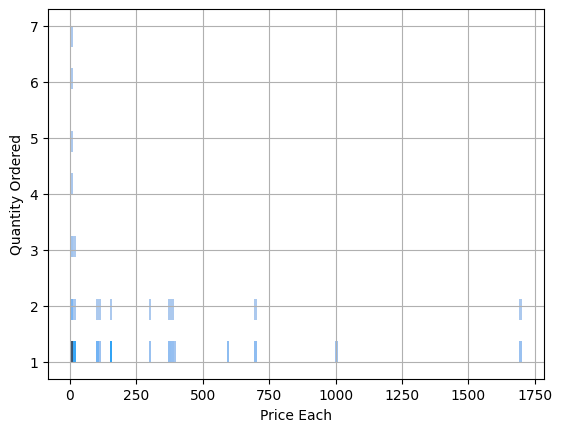

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data=df, x='Price Each', y='Quantity Ordered')

plt.ylabel('Quantity Ordered')
plt.xlabel('Price Each')
plt.grid(True)
plt.show()


<Axes: xlabel='Price Each', ylabel='Count'>

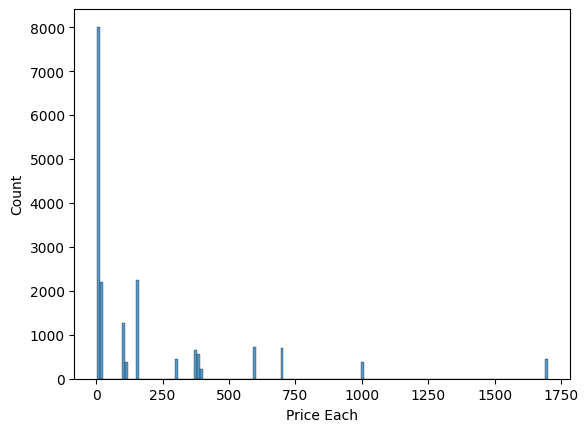

In [52]:
sns.histplot(df['Price Each'])

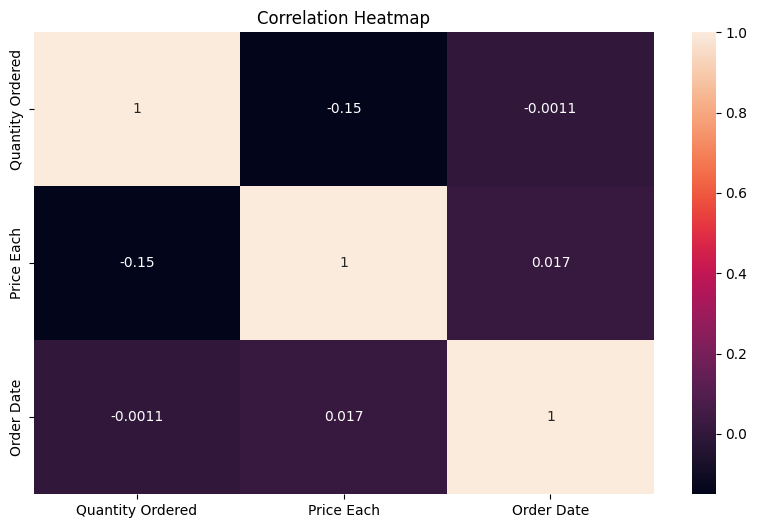

In [53]:

plt.figure(figsize=(10, 6))
sns.heatmap(df[['Quantity Ordered', 'Price Each', 'Order Date']].corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()


In [54]:
corr= df['Quantity Ordered'].corr(df['Price Each'])
corr


-0.15059033433544916

In [55]:
most_freq= df.groupby('Product')['Quantity Ordered'].sum().reset_index()
most_freq

,Product,Quantity Ordered
0,20in Monitor,394
1,27in 4K Gaming Monitor,565
2,27in FHD Monitor,737
3,34in Ultrawide Monitor,652
4,AA Batteries (4-pack),2821
5,AAA Batteries (4-pack),2933
6,Apple Airpods Headphones,1523
7,Bose SoundSport Headphones,1286
8,Flatscreen TV,458
9,Google Phone,581


In [56]:
most_freq.sort_values(by='Quantity Ordered', ascending=False)

,Product,Quantity Ordered
5,AAA Batteries (4-pack),2933
4,AA Batteries (4-pack),2821
12,Lightning Charging Cable,2365
15,USB-C Charging Cable,2266
17,Wired Headphones,2065
6,Apple Airpods Headphones,1523
7,Bose SoundSport Headphones,1286
2,27in FHD Monitor,737
18,iPhone,695
3,34in Ultrawide Monitor,652


In [57]:
freq_addr = df.groupby('Purchase Address')['Product'].sum().reset_index()
freq_addr.sort_values(by='Product', ascending=False)


,Purchase Address,Product
2229,"216 Chestnut St, Los Angeles, CA 90001",iPhoneWired HeadphonesAAA Batteries (4-pack)
5390,"387 12th St, San Francisco, CA 94016",iPhoneWired Headphones
16117,"947 Pine St, Portland, OR 97035",iPhoneWired Headphones
9522,"600 Highland St, Dallas, TX 75001",iPhoneWired Headphones
3477,"286 5th St, Dallas, TX 75001",iPhoneWired Headphones
...,...,...
3234,"273 4th St, Austin, TX 73301",20in Monitor
3227,"272 Hickory St, Los Angeles, CA 90001",20in Monitor
3216,"271 Walnut St, New York City, NY 10001",20in Monitor
10188,"636 14th St, Austin, TX 73301",20in Monitor


In [58]:
freq_items = df.groupby('Product')['Purchase Address'].sum().reset_index()
freq_items.sort_values(by='Purchase Address', ascending=False)


,Product,Purchase Address
8,Flatscreen TV,"936 Church St, San Francisco, CA 94016116 Nort..."
15,USB-C Charging Cable,"917 1st St, Dallas, TX 75001381 Wilson St, San..."
13,Macbook Pro Laptop,"915 Willow St, San Francisco, CA 94016853 Ceda..."
14,ThinkPad Laptop,"863 Hickory St, Los Angeles, CA 90001774 Fores..."
16,Vareebadd Phone,"85 North St, San Francisco, CA 94016125 North ..."
18,iPhone,"84 Jackson St, Boston, MA 0221515 Cherry St, S..."
0,20in Monitor,"765 Cherry St, Seattle, WA 98101804 Church St,..."
7,Bose SoundSport Headphones,"682 Chestnut St, Boston, MA 02215668 Center St..."
3,34in Ultrawide Monitor,"678 Hickory St, Portland, OR 97035661 Washingt..."
9,Google Phone,"669 Spruce St, Los Angeles, CA 90001444 7th St..."


In [59]:
from scipy import stats

numerical_columns = ['Quantity Ordered', 'Price Each', 'Total Cost']
stats.zscore(df[numerical_columns])


,Quantity Ordered,Price Each,Total Cost
0,2.004492,-0.521427,-0.487203
1,-0.285729,-0.255493,-0.258273
3,-0.285729,1.254837,1.246094
4,-0.285729,-0.521306,-0.523036
5,-0.285729,-0.521306,-0.523036
...,...,...,...
18378,-0.285729,1.254837,1.246094
18379,-0.285729,-0.545924,-0.547557
18380,2.004492,-0.548492,-0.541118
18381,-0.285729,-0.545924,-0.547557


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18267 entries, 0 to 18382
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          18267 non-null  int32         
 1   Product           18267 non-null  object        
 2   Quantity Ordered  18267 non-null  int32         
 3   Price Each        18267 non-null  float64       
 4   Order Date        18267 non-null  datetime64[ns]
 5   Purchase Address  18267 non-null  object        
 6   Total Cost        18267 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(2), object(2)
memory usage: 999.0+ KB


In [61]:
import pandas as pd



product_counts = df['Product'].value_counts()

min_occurrence = product_counts.min()
max_occurrence = product_counts.max()

product_occurrence = pd.DataFrame({
    'Product': product_counts.index,
    'Min Occurrence': [min_occurrence] * len(product_counts),
    'Max Occurrence': [max_occurrence] * len(product_counts)
})

print(product_occurrence)


                       Product  Min Occurrence  Max Occurrence
0     Lightning Charging Cable              61            2195
1         USB-C Charging Cable              61            2195
2        AA Batteries (4-pack)              61            2195
3       AAA Batteries (4-pack)              61            2195
4             Wired Headphones              61            2195
5     Apple Airpods Headphones              61            2195
6   Bose SoundSport Headphones              61            2195
7             27in FHD Monitor              61            2195
8                       iPhone              61            2195
9       34in Ultrawide Monitor              61            2195
10                Google Phone              61            2195
11      27in 4K Gaming Monitor              61            2195
12               Flatscreen TV              61            2195
13          Macbook Pro Laptop              61            2195
14             ThinkPad Laptop              61         

In [62]:
sns.histplot(df[''])

KeyError: 'City'